<a href="https://colab.research.google.com/github/AnshumanMohapatra11121999/Mini-Projects-in-Python/blob/main/Fraud_Detection_in_Banking_Transaction_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df.shape

(6362620, 11)

In [7]:






df.size

69988820

In [8]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [9]:
df.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4072985,300,CASH_OUT,264850.39,C2017057023,0.00,0.00,C1467664315,438440.74,703291.14,0,0
2951773,230,TRANSFER,106964.31,C1061631558,158160.00,51195.69,C1216434626,0.00,106964.31,0,0
4002585,298,CASH_IN,184575.99,C1084292668,13858663.54,14043239.52,C177363120,6224319.99,6039744.00,0,0
4398271,321,PAYMENT,132.57,C2069359517,0.00,0.00,M1610253415,0.00,0.00,0,0
3783847,280,CASH_OUT,125785.74,C2021011213,0.00,0.00,C1135482966,759214.95,885000.69,0,0
3684421,276,CASH_OUT,248299.28,C1819425353,0.00,0.00,C1685805763,488907.23,737206.51,0,0
22276,8,CASH_OUT,231858.65,C405935870,1553.00,0.00,C1654583020,17019.00,224286.07,0,0
2429283,202,CASH_OUT,231853.95,C1194971613,105909.00,0.00,C1022984663,60973.01,292826.96,0,0
2256551,187,PAYMENT,7932.96,C1035468555,0.00,0.00,M254132606,0.00,0.00,0,0
4601428,329,CASH_OUT,7908.09,C1329642310,0.00,0.00,C1710929766,12563.95,20472.05,0,0


In [10]:
df.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [11]:
#Sets the pandas display option to format floating-point numbers with four decimal places
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [12]:
round(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest',]].describe().T,
      2)

,count,mean,std,min,25%,50%,75%,max
step,6362620.0000,243.4000,142.3300,1.0000,156.0000,239.0000,335.0000,743.0000
amount,6362620.0000,179861.9000,603858.2300,0.0000,13389.5700,74871.9400,208721.4800,92445516.6400
oldbalanceOrg,6362620.0000,833883.1000,2888242.6700,0.0000,0.0000,14208.0000,107315.1800,59585040.3700
newbalanceOrig,6362620.0000,855113.6700,2924048.5000,0.0000,0.0000,0.0000,144258.4100,49585040.3700
oldbalanceDest,6362620.0000,1100701.6700,3399180.1100,0.0000,0.0000,132705.6600,943036.7100,356015889.3500
newbalanceDest,6362620.0000,1224996.4000,3674128.9400,0.0000,0.0000,214661.4400,1111909.2500,356179278.9200


In [13]:
df.loc[:, ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']].corr()



,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.0000,0.0224,-0.0101,-0.0103,0.0277,0.0259,0.0316,0.0033
amount,0.0224,1.0000,-0.0028,-0.0079,0.2941,0.4593,0.0767,0.0123
oldbalanceOrg,-0.0101,-0.0028,1.0000,0.9988,0.0662,0.0420,0.0102,0.0038
newbalanceOrig,-0.0103,-0.0079,0.9988,1.0000,0.0678,0.0418,-0.0081,0.0038
oldbalanceDest,0.0277,0.2941,0.0662,0.0678,1.0000,0.9766,-0.0059,-0.0005
newbalanceDest,0.0259,0.4593,0.0420,0.0418,0.9766,1.0000,0.0005,-0.0005
isFraud,0.0316,0.0767,0.0102,-0.0081,-0.0059,0.0005,1.0000,0.0441
isFlaggedFraud,0.0033,0.0123,0.0038,0.0038,-0.0005,-0.0005,0.0441,1.0000


In [14]:
df.query("amount == 0")


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0000,C1510987794,0.0000,0.0000,C1696624817,0.0000,0.0000,1,0
3247298,250,CASH_OUT,0.0000,C521393327,0.0000,0.0000,C480398193,0.0000,0.0000,1,0
3760289,279,CASH_OUT,0.0000,C539112012,0.0000,0.0000,C1106468520,538547.6300,538547.6300,1,0
5563714,387,CASH_OUT,0.0000,C1294472700,0.0000,0.0000,C1325541393,7970766.5700,7970766.5700,1,0
5996408,425,CASH_OUT,0.0000,C832555372,0.0000,0.0000,C1462759334,76759.9000,76759.9000,1,0
5996410,425,CASH_OUT,0.0000,C69493310,0.0000,0.0000,C719711728,2921531.3400,2921531.3400,1,0
6168500,554,CASH_OUT,0.0000,C10965156,0.0000,0.0000,C1493336195,230289.6600,230289.6600,1,0
6205440,586,CASH_OUT,0.0000,C1303719003,0.0000,0.0000,C900608348,1328472.8600,1328472.8600,1,0
6266414,617,CASH_OUT,0.0000,C1971175979,0.0000,0.0000,C1352345416,0.0000,0.0000,1,0
6281483,646,CASH_OUT,0.0000,C2060908932,0.0000,0.0000,C1587892888,0.0000,0.0000,1,0


In [15]:
df.query("isFlaggedFraud == 1")


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.0800,C728984460,4953893.0800,4953893.0800,C639921569,0.0000,0.0000,1,1
3247297,250,TRANSFER,1343002.0800,C1100582606,1343002.0800,1343002.0800,C1147517658,0.0000,0.0000,1,1
3760288,279,TRANSFER,536624.4100,C1035541766,536624.4100,536624.4100,C1100697970,0.0000,0.0000,1,1
5563713,387,TRANSFER,4892193.0900,C908544136,4892193.0900,4892193.0900,C891140444,0.0000,0.0000,1,1
5996407,425,TRANSFER,10000000.0000,C689608084,19585040.3700,19585040.3700,C1392803603,0.0000,0.0000,1,1
5996409,425,TRANSFER,9585040.3700,C452586515,19585040.3700,19585040.3700,C1109166882,0.0000,0.0000,1,1
6168499,554,TRANSFER,3576297.1000,C193696150,3576297.1000,3576297.1000,C484597480,0.0000,0.0000,1,1
6205439,586,TRANSFER,353874.2200,C1684585475,353874.2200,353874.2200,C1770418982,0.0000,0.0000,1,1
6266413,617,TRANSFER,2542664.2700,C786455622,2542664.2700,2542664.2700,C661958277,0.0000,0.0000,1,1
6281482,646,TRANSFER,10000000.0000,C19004745,10399045.0800,10399045.0800,C1806199534,0.0000,0.0000,1,1


In [16]:
df.query("amount == oldbalanceOrg and isFraud == 1")


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1,0
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1,0
251,1,TRANSFER,2806.0000,C1420196421,2806.0000,0.0000,C972765878,0.0000,0.0000,1,0
252,1,CASH_OUT,2806.0000,C2101527076,2806.0000,0.0000,C1007251739,26202.0000,0.0000,1,0
680,1,TRANSFER,20128.0000,C137533655,20128.0000,0.0000,C1848415041,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0
6362618,743,TRANSFER,850002.5200,C1685995037,850002.5200,0.0000,C2080388513,0.0000,0.0000,1,0


In [17]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [18]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [21]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


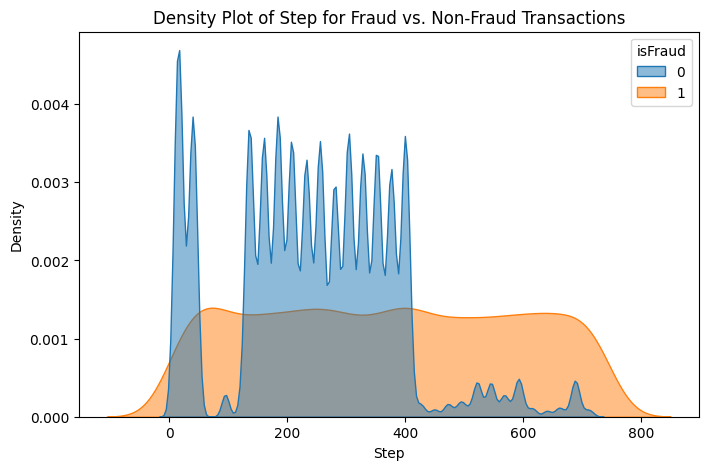

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='step', hue='isFraud', fill=True, common_norm=False, alpha=0.5)
plt.title("Density Plot of Step for Fraud vs. Non-Fraud Transactions")
plt.xlabel("Step")
plt.ylabel("Density")
plt.show()



<ipython-input-23-26ded133aadd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud', y='amount', data=df, palette='coolwarm')


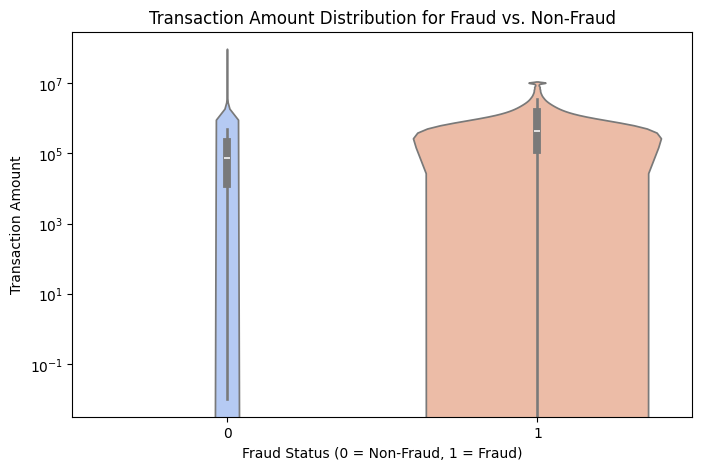

In [23]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='isFraud', y='amount', data=df, palette='coolwarm')
plt.title("Transaction Amount Distribution for Fraud vs. Non-Fraud")
plt.xlabel("Fraud Status (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.yscale("log")  # log scale for better visualization if values vary widely
plt.show()

In [24]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


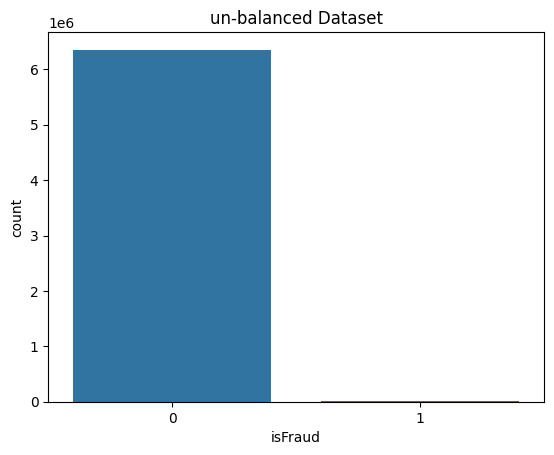

In [25]:
sns.countplot(x=df['isFraud'])
plt.title("un-balanced Dataset")
plt.show()

<ipython-input-26-b98fe41b27f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['isFraud'].value_counts().index,


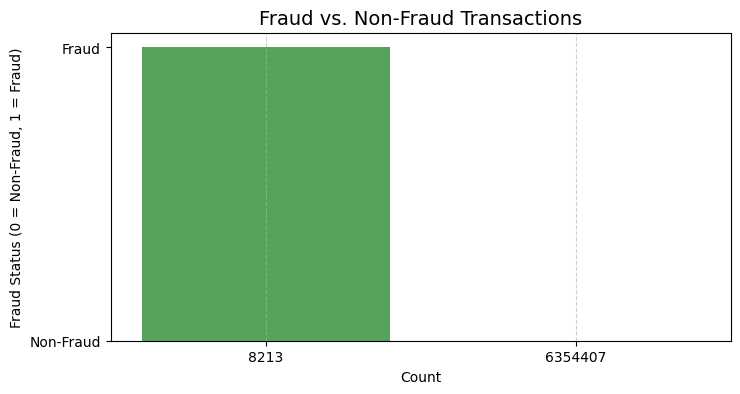

In [26]:
plt.figure(figsize=(8, 4))
sns.barplot(y=df['isFraud'].value_counts().index,
            x=df['isFraud'].value_counts().values,
            palette=['#4CAF50', '#F44336'])  # Green for Non-Fraud, Red for Fraud
plt.title("Fraud vs. Non-Fraud Transactions", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Fraud Status (0 = Non-Fraud, 1 = Fraud)")
plt.yticks([0, 1], labels=["Non-Fraud", "Fraud"])
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

<ipython-input-27-0e5b3b965b77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x="type", y="isFraud", kind="box", palette="coolwarm")


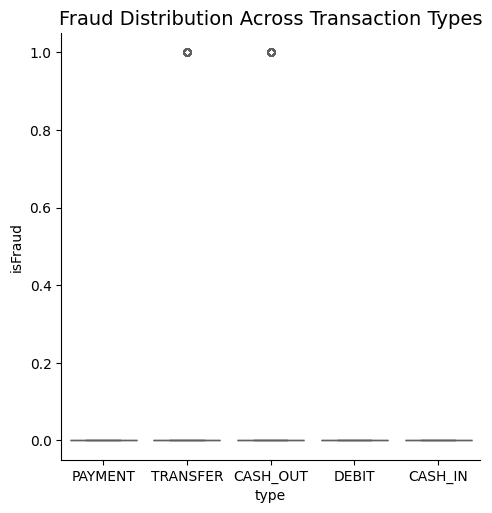

In [27]:
# Create a box plot with custom colors
sns.catplot(data=df, x="type", y="isFraud", kind="box", palette="coolwarm")

# Set title for better understanding
plt.title("Fraud Distribution Across Transaction Types", fontsize=14)
plt.show()

In [28]:
df.loc[(df['type']=="CASH_OUT") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1,0
252,1,CASH_OUT,2806.0000,C2101527076,2806.0000,0.0000,C1007251739,26202.0000,0.0000,1,0
681,1,CASH_OUT,20128.0000,C1118430673,20128.0000,0.0000,C339924917,6268.0000,12145.8500,1,0
724,1,CASH_OUT,416001.3300,C749981943,0.0000,0.0000,C667346055,102.0000,9291619.6200,1,0
970,1,CASH_OUT,1277212.7700,C467632528,1277212.7700,0.0000,C716083600,0.0000,2444985.1900,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.9900,C994950684,63416.9900,0.0000,C1662241365,276433.1800,339850.1700,1,0
6362613,743,CASH_OUT,1258818.8200,C1436118706,1258818.8200,0.0000,C1240760502,503464.5000,1762283.3300,1,0
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0


In [29]:
df.loc[(df['type']=="TRANSFER") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1,0
251,1,TRANSFER,2806.0000,C1420196421,2806.0000,0.0000,C972765878,0.0000,0.0000,1,0
680,1,TRANSFER,20128.0000,C137533655,20128.0000,0.0000,C1848415041,0.0000,0.0000,1,0
969,1,TRANSFER,1277212.7700,C1334405552,1277212.7700,0.0000,C431687661,0.0000,0.0000,1,0
1115,1,TRANSFER,35063.6300,C1364127192,35063.6300,0.0000,C1136419747,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.9900,C778071008,63416.9900,0.0000,C1812552860,0.0000,0.0000,1,0
6362612,743,TRANSFER,1258818.8200,C1531301470,1258818.8200,0.0000,C1470998563,0.0000,0.0000,1,0
6362614,743,TRANSFER,339682.1300,C2013999242,339682.1300,0.0000,C1850423904,0.0000,0.0000,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0


In [30]:
!pip install squarify
#can install this module if not availble in your pc

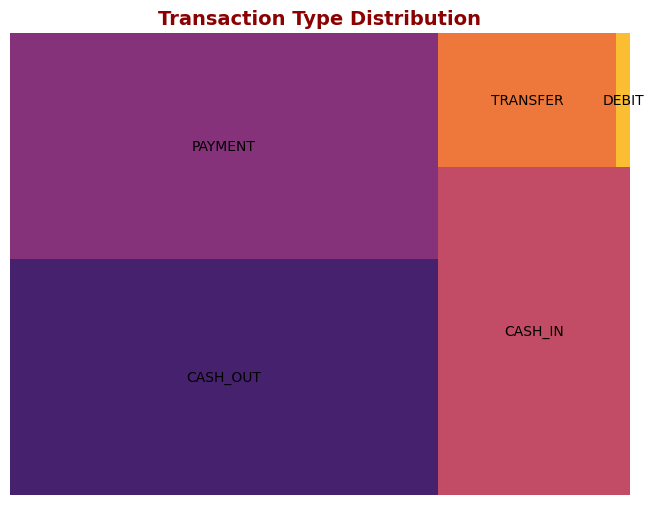

In [31]:
import squarify
# Count occurrences of each transaction type
type_counts = df['type'].value_counts()

# Define an aggressive color palette (e.g., "Reds", "Inferno", or "Dark2")
colors = sns.color_palette("inferno", len(type_counts))

# Create treemap
plt.figure(figsize=(8, 6))
squarify.plot(sizes=type_counts.values, label=type_counts.index, alpha=0.9, color=colors)

# Add title
plt.title("Transaction Type Distribution", fontsize=14, fontweight="bold", color="darkred")

# Remove axes for a cleaner look
plt.axis("off")

plt.show()

In [32]:
# using iqr method in "step" feature...

per25=df['step'].quantile(0.25)
per75=df['step'].quantile(0.75)
iqr=per75-per25
up_limit=per75+(1.5*iqr)
low_limit=per25-(1.5*iqr)
print("upper limit :- ",up_limit)
print("upper limit :- ",low_limit)

upper limit :-  603.5
upper limit :-  -112.5


In [33]:
df[df["step"]>603]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6259932,604,TRANSFER,714218.4800,C454938739,714218.4800,0.0000,C482986731,0.0000,0.0000,1,0
6259933,604,CASH_OUT,714218.4800,C1835708623,714218.4800,0.0000,C1881116283,106940.8300,821159.3100,1,0
6259934,604,TRANSFER,277582.5300,C2144116571,277582.5300,0.0000,C570246252,0.0000,0.0000,1,0
6259935,604,CASH_OUT,277582.5300,C1512896686,277582.5300,0.0000,C731882373,0.0000,277582.5300,1,0
6259936,604,TRANSFER,4672401.0400,C801580496,4672401.0400,0.0000,C1917884973,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0
6362618,743,TRANSFER,850002.5200,C1685995037,850002.5200,0.0000,C2080388513,0.0000,0.0000,1,0


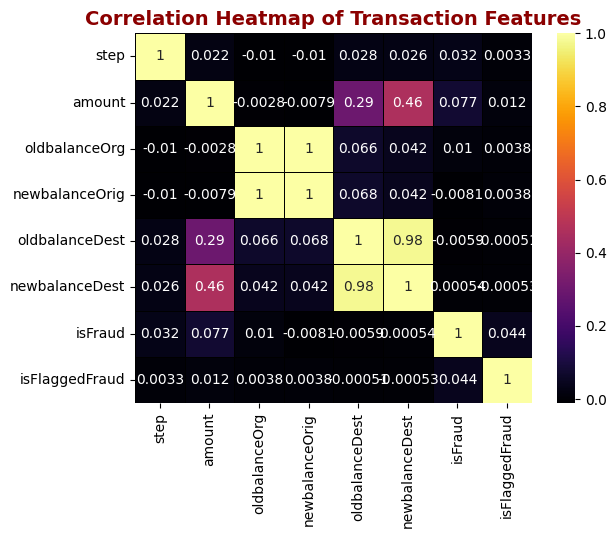

In [34]:
sns.heatmap(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
                'newbalanceDest', 'isFraud', 'isFlaggedFraud']].corr(),
            annot=True, cmap="inferno", linewidths=0.5, linecolor="black")

plt.title("Correlation Heatmap of Transaction Features", fontsize=14, fontweight="bold", color="darkred")
plt.show()


In [35]:
# df.corr()["isFraud"]
df.corr(numeric_only=True)["isFraud"]


,isFraud
step,0.0316
amount,0.0767
oldbalanceOrg,0.0102
newbalanceOrig,-0.0081
oldbalanceDest,-0.0059
newbalanceDest,0.0005
isFraud,1.0000
isFlaggedFraud,0.0441


In [36]:
# function which returns un_important features ( only numeric ).

def correlation(dataset,threshold):

    """
    used to store un_important column names
    and set() type stores only unique values
    so, that no duplicated column name will store.
    """
    column_corr=set()

    # storing correlation matrix
    corr_matrix=dataset.corr()

    for i in range (len(corr_matrix.columns)):
        for j in range (i):

            # comparing corr. values with threshold
            if corr_matrix.iloc[i,j]>threshold:

                # if true, then fateching column name
                colname=corr_matrix.columns[i]

                # adding column name to column_corr variable.
                column_corr.add(colname)
    return column_corr


In [37]:
# # calling ... with threshold value 0.9
# corr_matrix = df.corr(numeric_only=True)

# correlated_features=correlation(df,0.9)

# Calculate correlation matrix with numeric_only=True
corr_matrix = df.corr(numeric_only=True)

# Find correlated features based on a threshold of 0.9
correlated_features = correlation(corr_matrix, 0.9)

# Define function to find correlated features
def correlation(corr_matrix, threshold):
    correlated_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_features.add(colname)
    return correlated_features


In [38]:
# total number of un_important features
len(set(correlated_features))

2

In [39]:
# name of these columns ( independent features)
correlated_features

{'newbalanceDest', 'newbalanceOrig'}

In [40]:
# Removing these features from DataFrame.

df=df.drop(correlated_features,axis=1)

In [41]:
# After removing ...
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.6400,C1231006815,170136.0000,M1979787155,0.0000,0,0
1,1,PAYMENT,1864.2800,C1666544295,21249.0000,M2044282225,0.0000,0,0
2,1,TRANSFER,181.0000,C1305486145,181.0000,C553264065,0.0000,1,0
3,1,CASH_OUT,181.0000,C840083671,181.0000,C38997010,21182.0000,1,0
4,1,PAYMENT,11668.1400,C2048537720,41554.0000,M1230701703,0.0000,0,0


In [42]:
from sklearn.feature_selection import VarianceThreshold

In [43]:
"""
threshold=0  means feature having only 1 value ( no variation)
threshold=1 means feature having 2 different values ( small variation)
etc
"""
Var_Thresh=VarianceThreshold(threshold=0)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True,  True])

In [44]:
# when threshold=1

Var_Thresh=VarianceThreshold(threshold=1)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True, False])

In [45]:
df.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
nameDest,object
oldbalanceDest,float64
isFraud,int64
isFlaggedFraud,int64


In [46]:
print(" type having these unique values :- \n",df["type"].unique())
print("\n\n nameOrig having these unique values :- \n",df["nameOrig"].unique())
print("\n\n nameDest having these unique values :- \n",df["nameDest"].unique())

 type having these unique values :- 
 ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


 nameOrig having these unique values :- 
 ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']


 nameDest having these unique values :- 
 ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


In [47]:
df['nameOrig'].value_counts()

,count
nameOrig,
C1530544995,3
C545315117,3
C724452879,3
C1784010646,3
C1677795071,3
...,...
C1567523029,1
C644777639,1
C1256645416,1


In [48]:
df['nameDest'].value_counts()

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
...,...
M367627425,1
M1902904124,1
M242332837,1


In [49]:
df=df.drop({'nameOrig','nameDest'},axis=1)

In [50]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.6400,170136.0000,0.0000,0,0
1,1,PAYMENT,1864.2800,21249.0000,0.0000,0,0
2,1,TRANSFER,181.0000,181.0000,0.0000,1,0
3,1,CASH_OUT,181.0000,181.0000,21182.0000,1,0
4,1,PAYMENT,11668.1400,41554.0000,0.0000,0,0


In [51]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [52]:
df["type"].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [53]:
df['type']=df['type'].map({'CASH_OUT':5, 'PAYMENT':4,'CASH_IN':3,'TRANSFER':2,'DEBIT':1})

In [54]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,0.0000,0,0
1,1,4,1864.2800,21249.0000,0.0000,0,0
2,1,2,181.0000,181.0000,0.0000,1,0
3,1,5,181.0000,181.0000,21182.0000,1,0
4,1,4,11668.1400,41554.0000,0.0000,0,0


In [55]:
df["type"].unique()


array([4, 2, 5, 1, 3])

In [56]:
df["type"].value_counts()


,count
type,
5,2237500
4,2151495
3,1399284
2,532909
1,41432


In [57]:
df["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


In [58]:
"""
Creating 2 new DataFrame ,
one contain fraud transaction
and another one contain genuine transaction
"""
normal_transaction=df[df['isFraud']==0]
fraud_transaction=df[df['isFraud']==1]

In [59]:
normal_transaction.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,0.0000,0,0
1,1,4,1864.2800,21249.0000,0.0000,0,0
4,1,4,11668.1400,41554.0000,0.0000,0,0
5,1,4,7817.7100,53860.0000,0.0000,0,0
6,1,4,7107.7700,183195.0000,0.0000,0,0


In [60]:
fraud_transaction.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
2,1,2,181.0000,181.0000,0.0000,1,0
3,1,5,181.0000,181.0000,21182.0000,1,0
251,1,2,2806.0000,2806.0000,0.0000,1,0
252,1,5,2806.0000,2806.0000,26202.0000,1,0
680,1,2,20128.0000,20128.0000,0.0000,1,0


In [61]:
print(normal_transaction.shape)
print(fraud_transaction.shape)

(6354407, 7)
(8213, 7)


In [62]:
# taking random 8213 records from normal_transaction

normal_transaction=normal_transaction.sample(n=9500)

In [63]:
"""
Now, we have 50-50% fraud and normal transaction data.
next step is to concatenating them
"""
print(normal_transaction.shape)
print(fraud_transaction.shape)

(9500, 7)
(8213, 7)


In [64]:
normal_transaction['amount'].describe()

,amount
count,9500.0000
mean,170274.1571
std,443307.6185
min,2.9900
25%,13187.9075
50%,72337.6550
75%,205263.2375
max,22279423.3400


In [65]:
fraud_transaction['amount'].describe()

,amount
count,8213.0000
mean,1467967.2991
std,2404252.9472
min,0.0000
25%,127091.3300
50%,441423.4400
75%,1517771.4800
max,10000000.0000


In [66]:
# Concatenating these two dataset , to remove un-balanced dataset problem

# axis=0 means adding at rows
new_df=pd.concat([normal_transaction,fraud_transaction], axis=0)

In [67]:
new_df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
556116,22,5,435789.6300,0.0000,1369323.5800,0,0
4394484,321,4,2244.8500,0.0000,0.0000,0,0
1226567,133,5,91896.8600,0.0000,9417308.6200,0,0
6231218,592,4,10252.3100,0.0000,0.0000,0,0
3471936,258,4,5723.2700,76456.0000,0.0000,0,0


In [68]:
new_df.tail()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
6362615,743,5,339682.1300,339682.1300,0.0000,1,0
6362616,743,2,6311409.2800,6311409.2800,0.0000,1,0
6362617,743,5,6311409.2800,6311409.2800,68488.8400,1,0
6362618,743,2,850002.5200,850002.5200,0.0000,1,0
6362619,743,5,850002.5200,850002.5200,6510099.1100,1,0


In [69]:
new_df.shape

(17713, 7)

In [70]:
# independent features
X=new_df.drop("isFraud",axis=1)

# dependent feature
y=new_df["isFraud"]

In [71]:
X.shape

(17713, 6)

In [72]:
y.shape

(17713,)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
# stratify will evenly distribute the data values

x_train,x_test,y_train,y_test=train_test_split(X , y , test_size=0.2, stratify=y , random_state=0)

In [75]:
print("x-train :- ", x_train.shape)
print("x-test :-  ",  x_test.shape)
print("y-train :- ", y_train.shape)
print("y-test :-  ",  y_test.shape)

x-train :-  (14170, 6)
x-test :-   (3543, 6)
y-train :-  (14170,)
y-test :-   (3543,)


In [76]:
y_test.value_counts()

,count
isFraud,
0,1900
1,1643


In [77]:
y_train.value_counts()

,count
isFraud,
0,7600
1,6570


In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler=StandardScaler()

In [80]:
scaler.fit(x_train)

StandardScaler()

In [81]:
x_train_scaler=scaler.transform(x_train)

In [82]:
x_test_scaler=scaler.transform(x_test)

In [83]:
x_train_scaler

array([[-1.18301789, -1.38191205,  0.10854802, -0.07350827, -0.26413286,
        -0.02911318],
       [-0.34234702, -0.59280491, -0.31044734,  2.15604044, -0.11553707,
        -0.02911318],
       [-0.83839505, -1.38191205, -0.39615629, -0.36068946, -0.26413286,
        -0.02911318],
       ...,
       [-1.51719761,  0.98540938, -0.23343925, -0.3702009 , -0.24674705,
        -0.02911318],
       [-0.33712546, -0.59280491, -0.40199355, -0.17702141, -0.16203022,
        -0.02911318],
       [ 0.39389268, -2.1710192 , -0.43136037, -0.24756511, -0.21946194,
        -0.02911318]])

In [84]:
x_test_scaler

array([[ 0.02316205,  0.98540938, -0.24526187, -0.33618138, -0.26413286,
        -0.02911318],
       [ 0.4043358 ,  0.19630224, -0.42684605, -0.37350328, -0.26413286,
        -0.02911318],
       [-0.35279014,  0.98540938, -0.3636491 , -0.33584507, -0.26413286,
        -0.02911318],
       ...,
       [ 1.58962951,  0.98540938,  1.80585597,  0.86945881,  0.38250923,
        -0.02911318],
       [-0.67652675, -1.38191205,  0.19722343, -0.02424321, -0.26413286,
        -0.02911318],
       [ 1.00481499,  0.98540938,  3.5539611 ,  1.84064708,  1.76738304,
        -0.02911318]])

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the model
log_model = LogisticRegression().fit(x_train_scaler, y_train)

# Make predictions
y_pred = log_model.predict(x_test_scaler)

# Print accuracy score
print(f"\nLogistic Regression Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%\n")



Logistic Regression Accuracy: 78.69%



In [86]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Train the model and make predictions
bnb_model = BernoulliNB().fit(x_train_scaler, y_train)
y_pred = bnb_model.predict(x_test_scaler)

# Print accuracy
print(f"\nBernoulli Naive Bayes Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%\n")



Bernoulli Naive Bayes Accuracy: 71.92%



In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rand_model=RandomForestClassifier()

In [89]:
rand_model.fit(x_train_scaler,y_train)

RandomForestClassifier()

In [90]:
y_pred=rand_model.predict(x_test_scaler)

In [91]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
98.39119390347163
- - - - - - - - - - -


In [92]:
from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train_scaler, y_train)

# Predict using XGBoost
y_pred = xgb_model.predict(x_test_scaler)

# Print accuracy for XGBoost
print("- - - - - - - - - - -")
print("XGBoost Accuracy:", accuracy_score(y_test.values, y_pred) * 100)
print("- - - - - - - - - - -")


- - - - - - - - - - -
XGBoost Accuracy: 98.92746260231442
- - - - - - - - - - -


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:54:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [93]:
from sklearn.svm import SVC

In [94]:
svm_model=SVC()

In [95]:
svm_model.fit(x_train_scaler,y_train)

SVC()

In [96]:
y_pred=svm_model.predict(x_test_scaler)

In [97]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
90.91165678803273
- - - - - - - - - - -


In [98]:
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()

In [99]:
gnb_model.fit(x_train_scaler,y_train)

GaussianNB()

In [100]:
y_pred=gnb_model.predict(x_test_scaler)

In [101]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
61.84024837708157
- - - - - - - - - - -


In [102]:
# Function to print train and test accuracy scores for all models
def print_model_scores(model, model_name):
    train_score = accuracy_score(y_train, model.predict(x_train_scaler)) * 100
    test_score = accuracy_score(y_test, model.predict(x_test_scaler)) * 100
    print(f"\n{model_name} Performance:")
    print(f"Train Accuracy: {train_score:.2f}%")
    print(f"Test Accuracy: {test_score:.2f}%")
    print("-" * 30)

# Print accuracy scores for all models
print_model_scores(log_model, "Logistic Regression")
print_model_scores(rand_model, "Random Forest Classifier")
print_model_scores(svm_model, "Support Vector Machine (SVM)")
print_model_scores(bnb_model, "Bernoulli Naive Bayes")
print_model_scores(gnb_model, "Gaussian Naive Bayes")
print_model_scores(xgb_model, "XGBoost Classifier")  # Added XGBoost here



Logistic Regression Performance:
Train Accuracy: 79.84%
Test Accuracy: 78.69%
------------------------------

Random Forest Classifier Performance:
Train Accuracy: 100.00%
Test Accuracy: 98.39%
------------------------------

Support Vector Machine (SVM) Performance:
Train Accuracy: 90.98%
Test Accuracy: 90.91%
------------------------------

Bernoulli Naive Bayes Performance:
Train Accuracy: 72.41%
Test Accuracy: 71.92%
------------------------------

Gaussian Naive Bayes Performance:
Train Accuracy: 61.51%
Test Accuracy: 61.84%
------------------------------

XGBoost Classifier Performance:
Train Accuracy: 99.90%
Test Accuracy: 98.93%
------------------------------


In [105]:
'''Top 3 Models for Fraud Detection
XGBoost Classifier

Train Accuracy: 99.90%

Test Accuracy: 98.93%

Reason for Selection: XGBoost provides the best overall accuracy and generalization,
making it highly effective for fraud detection.

Random Forest Classifier

Train Accuracy: 100.00%

Test Accuracy: 98.39%

Reason for Selection: Random Forest is a reliable and robust model that performs well with imbalanced datasets,
though its test accuracy is slightly lower than XGBoost.

Support Vector Machine (SVM)

Train Accuracy: 90.98%

Test Accuracy: 90.91%

Reason for Selection: SVM provides a good balance between accuracy and interpretability,
making it a suitable choice for fraud detection when working with smaller datasets.

Final Recommendation for Deployment
The XGBoost Classifier should be the primary choice due to its high accuracy and generalization capability.
The Random Forest Classifier can serve as an alternative,
while the Support Vector Machine can be considered for specific scenarios where interpretability is important.
If computational efficiency is a priority,
Logistic Regression could be used instead of SVM.'''

'Top 3 Models for Fraud Detection\nXGBoost Classifier\n\nTrain Accuracy: 99.90%\n\nTest Accuracy: 98.93%\n\nReason for Selection: XGBoost provides the best overall accuracy and generalization, making it highly effective for fraud detection.\n\nRandom Forest Classifier\n\nTrain Accuracy: 100.00%\n\nTest Accuracy: 98.39%\n\nReason for Selection: Random Forest is a reliable and robust model that performs well with imbalanced datasets, though its test accuracy is slightly lower than XGBoost.\n\nSupport Vector Machine (SVM)\n\nTrain Accuracy: 90.98%\n\nTest Accuracy: 90.91%\n\nReason for Selection: SVM provides a good balance between accuracy and interpretability, making it a suitable choice for fraud detection when working with smaller datasets.\n\nFinal Recommendation for Deployment\nThe XGBoost Classifier should be the primary choice due to its high accuracy and generalization capability. The Random Forest Classifier can serve as an alternative, while the Support Vector Machine can be co

In [103]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Dictionary of trained models
models = {
    "Logistic Regression": log_model,
    "Random Forest": rand_model,
    "SVM": svm_model
}

# Creating input fields for all required transaction details (matching training features)
step_input = widgets.IntText(description="Step:")
amount_input = widgets.FloatText(description="Amount:")
oldbalanceOrg_input = widgets.FloatText(description="Old Balance:")
newbalanceOrig_input = widgets.FloatText(description="New Balance:")
oldbalanceDest_input = widgets.FloatText(description="Old Bal. Dest:")
transaction_type_input = widgets.Dropdown(
    options=[("CASH_OUT", 5), ("TRANSFER", 2)],
    description="Type:"
)

# Model selection dropdown
model_selector = widgets.Dropdown(
    options=list(models.keys()),
    description="Model:"
)

# Predict button
predict_button = widgets.Button(description="Predict Fraud")
output_label = widgets.Output()

# Function to make prediction
def predict_transaction(b):
    input_data = np.array([
        step_input.value,
        amount_input.value,
        oldbalanceOrg_input.value,
        newbalanceOrig_input.value,
        oldbalanceDest_input.value,
        transaction_type_input.value  # Ensuring 6 features match trained model
    ]).reshape(1, -1)

    # Scale the input data using the trained scaler
    input_data_scaled = scaler.transform(input_data)

    # Get the selected model
    selected_model = models[model_selector.value]

    # Predict fraud
    prediction = selected_model.predict(input_data_scaled)[0]

    # Display result
    with output_label:
        output_label.clear_output()
        if prediction == 1:
            print("🚨 Fraudulent Transaction Detected!")
        else:
            print("✅ Transaction is Safe.")

# Bind button to function
predict_button.on_click(predict_transaction)

# Display widgets
display(step_input, amount_input, oldbalanceOrg_input, newbalanceOrig_input, oldbalanceDest_input,
        transaction_type_input, model_selector, predict_button, output_label)


IntText(value=0, description='Step:')

FloatText(value=0.0, description='Amount:')

FloatText(value=0.0, description='Old Balance:')

FloatText(value=0.0, description='New Balance:')

FloatText(value=0.0, description='Old Bal. Dest:')

Dropdown(description='Type:', options=(('CASH_OUT', 5), ('TRANSFER', 2)), value=5)

Dropdown(description='Model:', options=('Logistic Regression', 'Random Forest', 'SVM'), value='Logistic Regres…

Button(description='Predict Fraud', style=ButtonStyle())

Output()